In [5]:
from WPSProtocol.InitialFunctions import *
from WPSProtocol.Part_2A import *

##### Here an example for SS+S Type Hamiltonians with nearest neighbor (NN) interactions is demonstrated to decouple these interactions using Pulse sequences. This can be also done for SS with NN interactions.
##### Plot of Log(|1 - F|) vs Time is plotted for different values of tau (this is the time period after which the pulse sequences are repeated upto Time T) and number of qubits. 

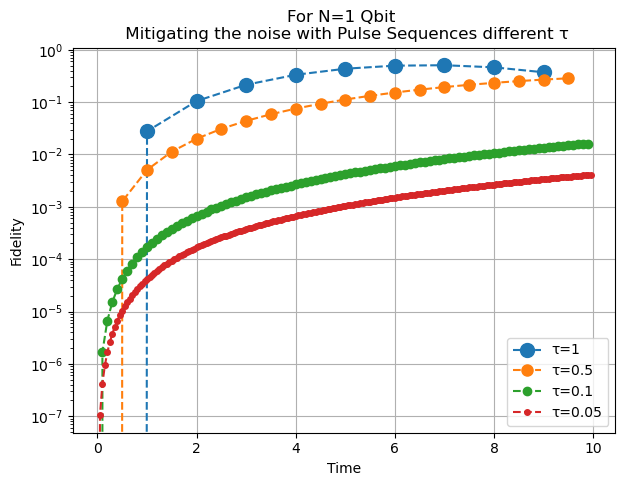

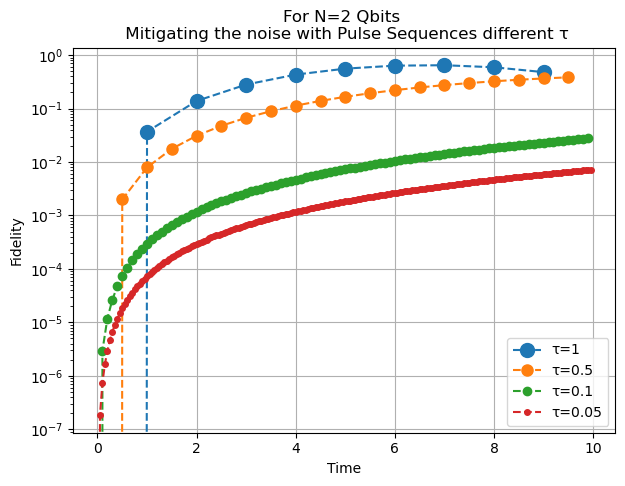

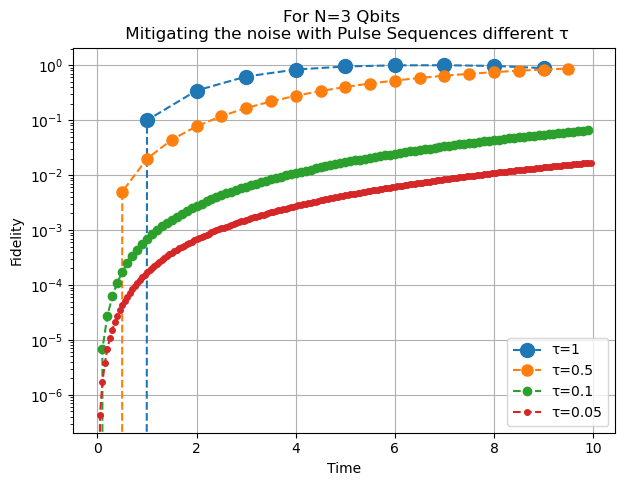

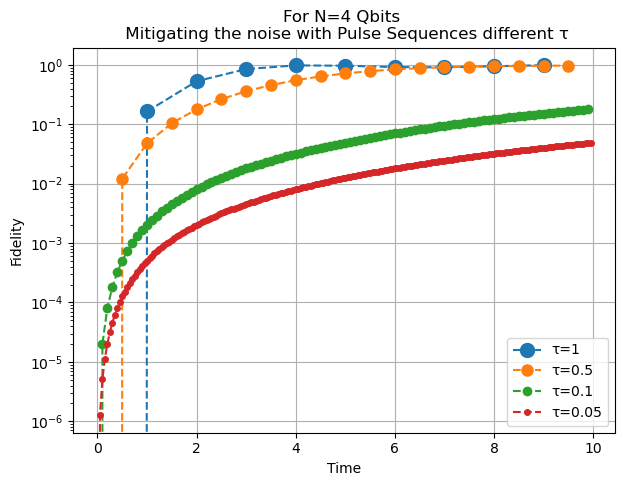

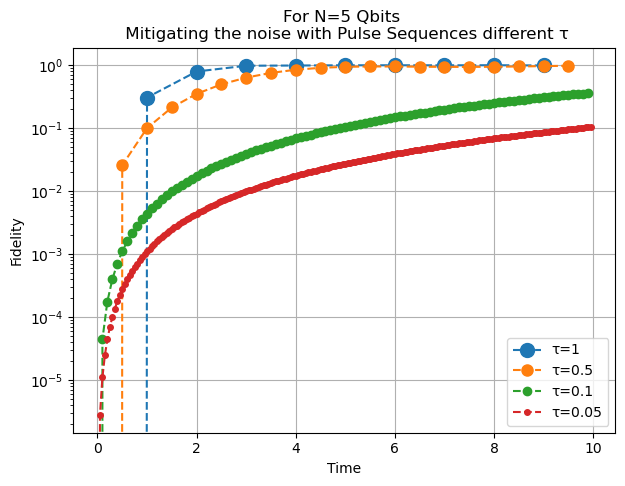

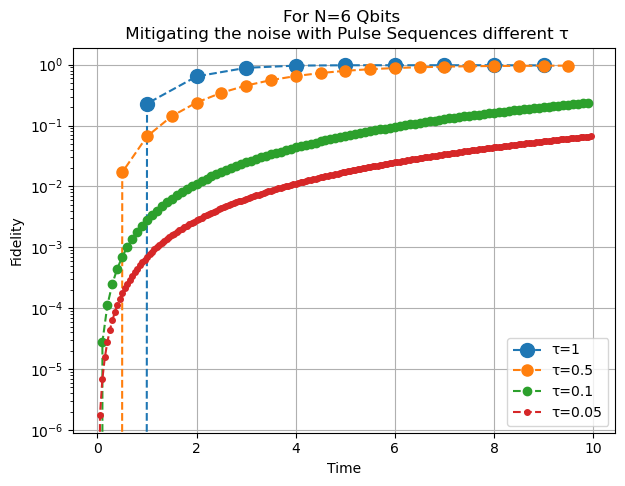

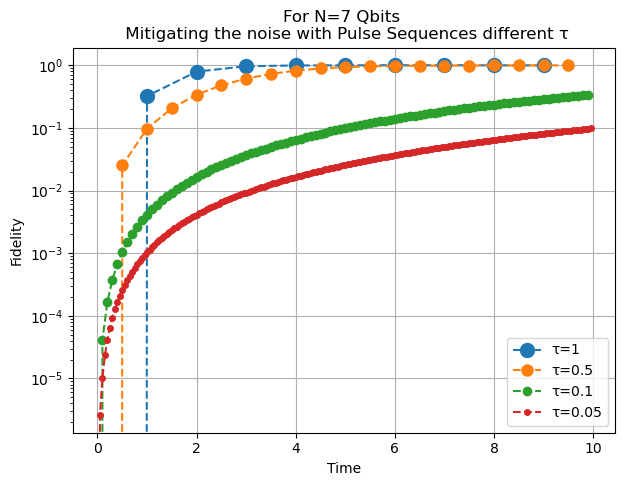

In [6]:
params = {
'N' : 1,
'tau_list':[1, 0.5, 0.1, 0.05],
'tau': 0.1,
'n': 2,
'alpha': 1,
'T': 10,
'R':[],
'r':[],
'psi_nm':[],
'opH': [X, Y], # Need to change this specific to Model
'pulses': [I, Z] # Need to change this specific to Model
}

# print(r)
# print(R)
mss=10

# print(params['tau_list'])

for i in range(1, 8, 1):
    params['N'] = i
    params['pulses'] = [I, Z, X, Y]
    params['opH'] = [Y, X, Z]
    params['n'] = len(params['pulses'])
    params['alpha'] = 6
    n, N, r, op, pulses, psi_nm, R, alpha = initialVals(params)
    params['r'], params['R'], params['psi_nm'] = r, R, psi_nm

    mss=10

    
    plt.figure(figsize=[7,5])
    for tau in params['tau_list']:
        params['tau'] = tau
        F = []
        uOp, t = TimeEvolOpForTFH(params, TFH = TogglingFrame_Ising(params)+TogglingFrameH(params))   
        psi_t = [normalizeWF(u@psi_nm) for i,u in enumerate(uOp)]
        F = [1-np.power(np.abs(np.vdot(psi_nm, pt)), 2) for pt in psi_t]
    #     print(F)
        plt.plot(t, F, "--o", label = f"τ={tau}", ms=mss)
        mss -=2
        plt.yscale("log")
        plt.legend()
        plt.xlabel("Time")
        plt.ylabel("Fidelity")
        if params['N'] == 1:
            plt.title(f"For N={params['N']} Qbit \n Mitigating the noise with Pulse Sequences different τ")
        elif params['N'] != 1:
            plt.title(f"For N={params['N']} Qbits \n Mitigating the noise with Pulse Sequences different τ")
        plt.grid('on')
    plt.show()
